# Preliminary Training 

## 1. Load data set and initialize the Siamese Net

In [4]:
import torch 
import torch.nn as nn
import torch.nn.functional as F
import torchvision 
from torchvision import transforms

import datasets
# reload(datasets)
import siamese_net

from imp import reload

In [5]:
train_data=datasets.Reddit_Img_Pair('.',transform=transforms.Compose([                      
                       transforms.Resize((224, 224)),
                       transforms.ToTensor(),
                   ]),re_select=True)
# train_data=datasets.Reddit_Img_Pair('.',transform=transforms.Compose([                      
#                        transforms.Resize((224, 224)),
#                        transforms.ToTensor(),
#                        transforms.Normalize((0.1307,), (0.3081,))
#                    ]),re_select=True)
test_data=datasets.Reddit_Img_Pair('.',train=False, transform=transforms.Compose([                      
                       transforms.Resize((224, 224)),
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ]),re_select=True)

In [6]:
train_loader = torch.utils.data.DataLoader(
    train_data, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(
    test_data, batch_size=64, shuffle=False)

In [7]:
net=siamese_net.SiameseNet(model_type=1)

In [64]:
net

SiameseNet(
  (branch): SiameseBranch(
    (locnet): LocNet(
      (alex_conv): Sequential(
        (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
        (1): ReLU(inplace)
        (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
        (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
        (4): ReLU(inplace)
        (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
        (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (7): ReLU(inplace)
        (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (9): ReLU(inplace)
        (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (11): ReLU(inplace)
        (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
      )
      (extra_conv): Conv2d(256, 128, kernel_size=(1, 1), stride=(1, 1))
      (fc_loc): Sequent

In [9]:
next(iter(train_loader))[0][0].size()

torch.Size([64, 3, 224, 224])

## 2. Feed the data and calculate the loss

Test the network.

In [10]:
import losses
reload(losses)

<module 'losses' from '/Users/shuo/Desktop/Image-Virality/losses.py'>

In [11]:
data,label=next(iter(train_loader))

In [12]:
output1,output2=net(data)

In [13]:
criterion = losses.PairCrossEntropy()
# criterion = losses.ContrastiveLoss(1)

In [15]:
loss=criterion(output1,output2,label)

In [16]:
loss.backward()

## 3. Load part of the pretrained model 

The LocNet is used for localizing the local part for virality. 

In this part, load part of this network and see the transformed image.


In [34]:
import siamese_net
# reload(siamese_net)

In [35]:
model=siamese_net.SiameseNet()

load the pretrained state dict.

In [36]:
model_checkpoint=torch.load('./checkpoints/7_model.pth')
model.load_state_dict(model_checkpoint['model_state_dict'])

Create a new network, to get the theta for the image

In [37]:
class Net_Part(nn.Module):
    def __init__(self):
        super(Net_Part, self).__init__()
        # get the locnet part of the pretrained model
        self.STN=model.branch.locnet
    def forward(self,x):
        return self.STN(x)

In [38]:
model_part=Net_Part()
model_part

Net_Part(
  (STN): LocNet(
    (alex_conv): Sequential(
      (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
      (1): ReLU(inplace)
      (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
      (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
      (4): ReLU(inplace)
      (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
      (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (7): ReLU(inplace)
      (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (9): ReLU(inplace)
      (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (11): ReLU(inplace)
      (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (extra_conv): Conv2d(256, 128, kernel_size=(1, 1), stride=(1, 1))
    (fc_loc): Sequential(
      (0): Linear(in_features=4608, out_features=128, bias=True

Using the `model_part` to get the transformation theta and visualize the transformed image

In [22]:
import visualisation as vis
# reload(vis)

In [23]:
test_batch_data,test_batch_label=next(iter(train_loader))

In [24]:
print(test_batch_data[0].size())
test_batch_data[0]

torch.Size([64, 3, 224, 224])


tensor([[[[0.1176, 0.1216, 0.1725,  ..., 0.4118, 0.4706, 0.5804],
          [0.1216, 0.1294, 0.1804,  ..., 0.4118, 0.4706, 0.5804],
          [0.1216, 0.1294, 0.1804,  ..., 0.4118, 0.4706, 0.5804],
          ...,
          [0.5333, 0.4784, 0.6000,  ..., 0.6000, 0.6706, 0.7412],
          [0.5137, 0.4706, 0.6118,  ..., 0.5686, 0.6745, 0.8039],
          [0.3843, 0.4078, 0.5098,  ..., 0.5333, 0.6824, 0.8078]],

         [[0.1020, 0.1059, 0.1569,  ..., 0.3608, 0.4275, 0.5373],
          [0.1059, 0.1137, 0.1647,  ..., 0.3608, 0.4275, 0.5373],
          [0.1059, 0.1137, 0.1647,  ..., 0.3608, 0.4275, 0.5373],
          ...,
          [0.4235, 0.3686, 0.4863,  ..., 0.4980, 0.5686, 0.6392],
          [0.4000, 0.3569, 0.5059,  ..., 0.4667, 0.5725, 0.7020],
          [0.2784, 0.3020, 0.4078,  ..., 0.4314, 0.5804, 0.7059]],

         [[0.1059, 0.1098, 0.1608,  ..., 0.3569, 0.4157, 0.5216],
          [0.1098, 0.1176, 0.1686,  ..., 0.3569, 0.4157, 0.5216],
          [0.1098, 0.1176, 0.1686,  ..., 0

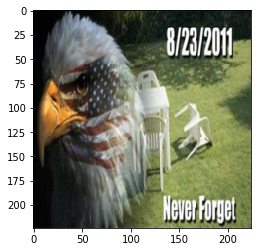

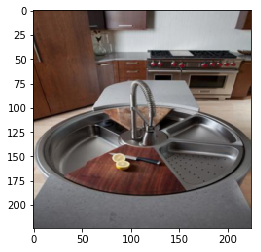

In [41]:
vis.show_img_in_notebook(test_batch_data[0][5])
vis.show_img_in_notebook(test_batch_data[1][5])


In [40]:
output_1=model_part(test_batch_data[0])
output_2=model_part(test_batch_data[1])

torch.Size([64, 3]) tensor([[-0.2332,  0.1702,  0.1252],
        [-0.1052,  0.1381,  0.0065],
        [-0.0084,  0.2349, -0.0423],
        [-0.1326,  0.1261,  0.0672],
        [-0.0509,  0.1118,  0.1532],
        [-0.2734,  0.1793, -0.1275],
        [-0.2604,  0.2906,  0.2304],
        [-0.1443,  0.2588,  0.0328],
        [-0.1979,  0.2434,  0.0232],
        [-0.2402,  0.1601,  0.0673],
        [-0.1402,  0.1862,  0.1284],
        [-0.4269,  0.1403,  0.3181],
        [-0.1032,  0.1620, -0.0094],
        [-0.0326,  0.2557,  0.2976],
        [-0.0764,  0.1850, -0.0434],
        [-0.2395,  0.1796,  0.1906],
        [-0.1655,  0.3631,  0.1115],
        [-0.1589, -0.0055, -0.0489],
        [-0.0510,  0.2522,  0.0755],
        [-0.1806,  0.2555, -0.0438],
        [-0.1139,  0.1872,  0.1736],
        [-0.0723,  0.2444,  0.0057],
        [-0.1673,  0.0725, -0.0031],
        [-0.0946,  0.1529, -0.0283],
        [-0.1507,  0.1435,  0.2303],
        [-0.1021,  0.1603,  0.2349],
        [-0.1306, 

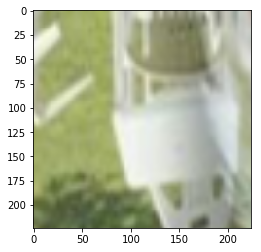

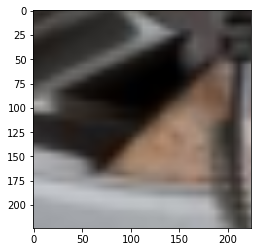

In [42]:
vis.show_img_in_notebook(output_1[5])
vis.show_img_in_notebook(output_2[5])
# by printing the intermediate value of the affine transformation, 
# the small image is due to the small value of s(the first element)

In [344]:
# vis.show_img(test_batch_data[0][4])
# vis.show_img(test_batch_data[1][4])

# for i in range(2):
#     vis.show_img(test_batch_data[0][i])
#     vis.show_img(test_batch_data[1][i])

In [346]:
# for i in range(2):
#     vis.show_img(output_1[i])
#     vis.show_img(output_2[i])

## 4. Show the parameter 

Have a look at the intermediate parameter and see what I can do.

I find the part after affine transformation is too small. Maybe I can apply the Xaiver initialization method.

To do:
- Freeze the Pretrained model. Because the pre-trained model is trained on the huge dataset, and have the ability of capture the common information (like the category, object etc.), so keep it to see whether it will help improve the accuracy.    ----- (tried)

- Clean the images data set. (use small number of subreddit, like 5 or only 1)

- Modify the architecture of the siamese network. (now is alexnet, try to embed the VGG or ResNet into that)

In [58]:
# model_part

**Freeze certain parts of the network**

`model.eval()` and `requires_grad` is different. The eval only affect the `dropout` and `batchnorm` layers, but each layer has the information of `requires_grad`.

In [56]:
# model_part.eval()
for param in model_part.STN.alex_conv.parameters():
    param.requires_grad = False
# for param in model_part.parameters():
#     param.requires_grad = True

In [57]:
for name,param in model_part.named_parameters():
    print(name,param)

STN.alex_conv.0.weight Parameter containing:
tensor([[[[ 1.1864e-01,  9.4069e-02,  9.5435e-02,  ...,  5.5822e-02,
            2.1575e-02,  4.9963e-02],
          [ 7.4882e-02,  3.8940e-02,  5.2979e-02,  ...,  2.5709e-02,
           -1.1299e-02,  4.1590e-03],
          [ 7.5425e-02,  3.8779e-02,  5.4930e-02,  ...,  4.3596e-02,
            1.0225e-02,  1.3251e-02],
          ...,
          [ 9.3155e-02,  1.0374e-01,  6.7547e-02,  ..., -2.0277e-01,
           -1.2839e-01, -1.1220e-01],
          [ 4.3544e-02,  6.4916e-02,  3.6164e-02,  ..., -2.0248e-01,
           -1.1376e-01, -1.0719e-01],
          [ 4.7369e-02,  6.2543e-02,  2.4758e-02,  ..., -1.1844e-01,
           -9.5567e-02, -8.3890e-02]],

         [[-7.2634e-02, -5.7996e-02, -8.0661e-02,  ..., -6.0304e-04,
           -2.5309e-02,  2.5471e-02],
          [-6.9042e-02, -6.7562e-02, -7.6367e-02,  ..., -3.9616e-03,
           -3.0402e-02,  1.0477e-02],
          [-9.9517e-02, -8.5592e-02, -1.0521e-01,  ..., -2.6587e-02,
           -2